# Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

from scipy.cluster.hierarchy import dendrogram, linkage

# Preparemos data de prueba (Creación de data)

* Creo data

In [5]:
X,y,c = make_blobs(n_samples=500, centers =4, n_features=2,
                 return_centers = True)

* Creación Dataframe data

In [6]:
df_blobs = pd.DataFrame({
    'x1': X[:,0],
    'x2': X[:,1],
    'y':y
})

* Creo data con centroides

In [7]:
df_centers = pd.DataFrame({
    'x1': c[:,0],
    'x2': c[:,1]
})

# Visualización de datos

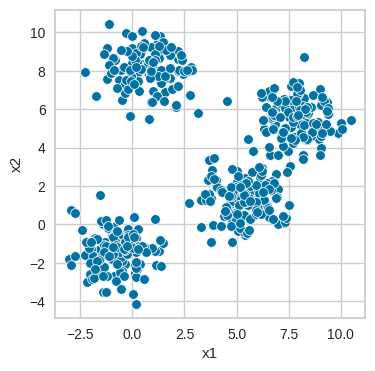

In [9]:
fig = plt.figure(figsize = (4,4))
sns.scatterplot(data=df_blobs, x='x1', y ='x2')
plt.show()

# Aplicación de Hierarchical Clustering y Dendrograma

## Aplicación

* Dendrograma

Text(0, 0.5, 'Distancia Euclidiada')

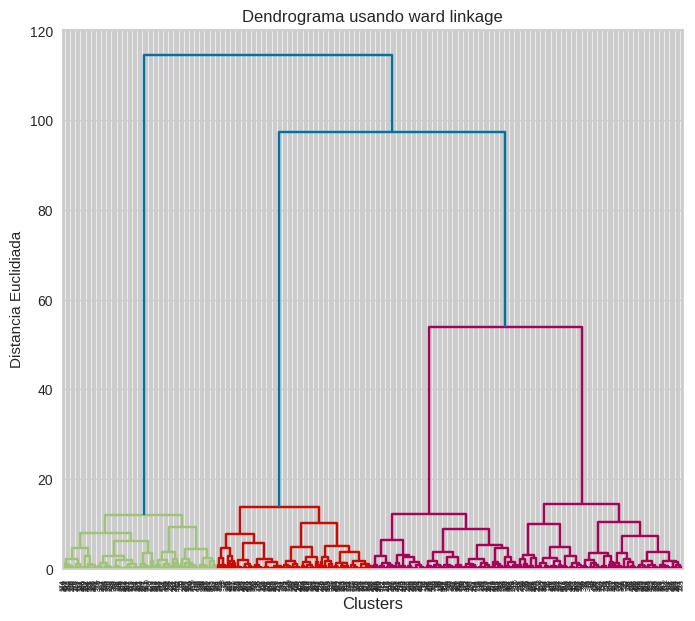

In [11]:
fig = plt.figure(figsize = (8, 7))

dendrogram_plot = dendrogram(linkage(X, method='ward'))
plt.title('Dendrograma usando ward linkage')
plt.xlabel('Clusters', fontsize= 12)
plt.ylabel('Distancia Euclidiada')

* Creo modelo de clusterización

In [12]:
#affinity es el tipo de distancia a emplear
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

* Predicción, y clusterización

In [13]:
y_hc = hc.fit_predict(X);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## Grafico la clusterización alcanzada/predicciones

* Meto resultado en una nueva variable del DS

In [15]:
df_blobs['cluster'] = y_hc

* Visualización

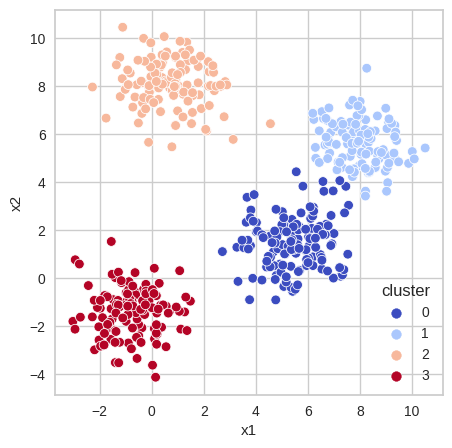

In [17]:
fig = plt.figure(figsize = (5,5))
sns.scatterplot(data=df_blobs, x='x1', y ='x2', hue= 'cluster', palette='coolwarm')
plt.show()

# Evaluación del modelo

* Saco índice de silueta promedio

In [18]:
silhouette_score(X,y_hc)

0.6807013237573132

* Script de Scikitlearn para evaluar coef. de silueta

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6807013237573132


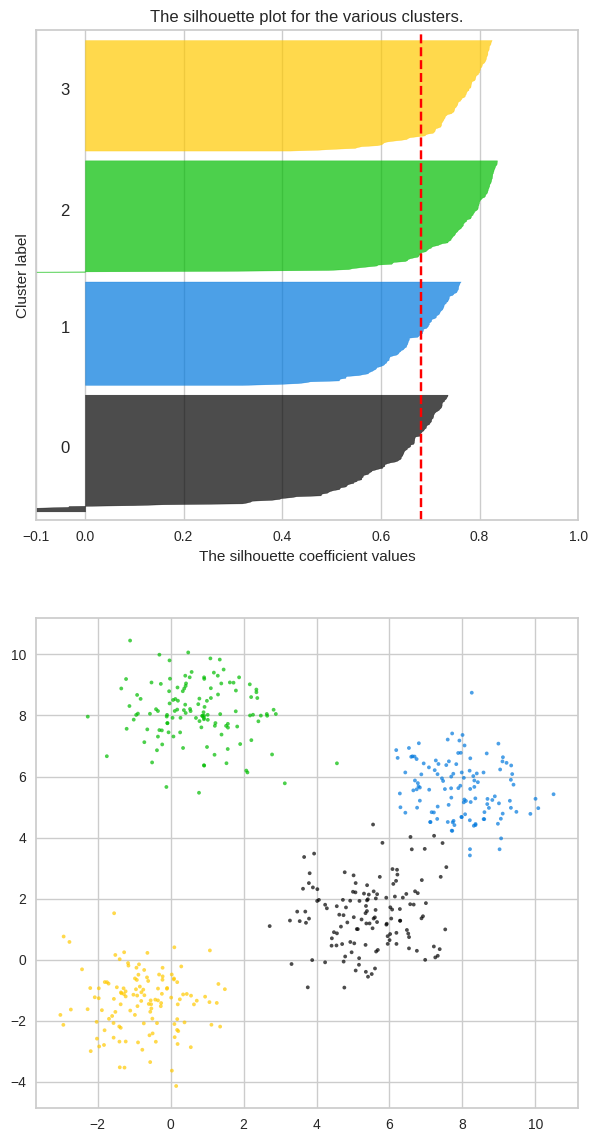

In [22]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Con cuantos clusters deseo hacer la gráfica
range_n_clusters = [4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.set_size_inches(7, 14)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # -----------Labeling the clusters-----------
    #de aqui pa abjo se va

plt.show()